In [ ]:
import pandas as pd
import requests
import numpy as np
pd. set_option('display.max_rows', 500)
pd. set_option('display.max_columns', 500)


url = 'https://www.ambitionbox.com/api/v2/reviews/data/114?page=1&sort=recent'

req = requests.get(url)

In [ ]:
ebi = req.json()

In [ ]:
ebi

In [ ]:
ebi.keys()

dict_keys(['data', 'status', 'message', 'meta', 'code'])

In [ ]:
ebi['data']

In [ ]:
type(ebi['data'])

dict

In [ ]:
df = pd.DataFrame(ebi['data']['reviews'])

In [ ]:
# displaying first 5 records

df.head()

,Id,CompanyName,UrlName,LikesText,DisLikesText,WorkDescriptionTags,WorkDescriptionText,BenefitsText,JobLocation,Division,OverallCompanyRating,Views,WorkPolicy,WorkPolicyOther,ResponseId,Created,Modified,Url,HelpfulCount,NotHelpfulCount,UserName,Picture,StartDate,EndDate,CurrentJob,UserId,RatingDistribution,ModifiedHumanReadable,ModifiedMachineReadable,WorkLabels,JobProfile,Facilities,ReviewerExperience,EmployerResponse,k,Verified,ParentTag
0,32813239,Amazon,amazon,"If you work hard, it gets recognised and you g...",Too much competition and it becomes overwhelmi...,None,Average. Could be better.,,"{'Id': 202, 'Name': 'Bangalore', 'UrlName': 'b...",Marketing,4,0,None,None,0,2022-06-24 23:38:03,2022-06-24 23:41:09,/reviews/amazon-reviews?rid=32813239,0,0,Anonymous,,None,None,None,0,"[{'Name': 'Work-Life Balance', 'count': 3}, {'...",24 Jun 2022,2022-06-24,"{'TravelTags': ['No Travel'], 'WorkTimeMonitor...","{'Id': 185, 'Name': 'Program Manager', 'UrlNam...",[],,,t7LWHAdIsqUyZFSrU%2FcggaRaf3pHrcUaxEmkb7OgaoWn...,1,NaN
1,32813255,Amazon,amazon,Good pay,Peak season is tiresome,None,None,None,"{'Id': 0, 'Name': '', 'UrlName': None}",Customer Service,5,0,WFH,None,0,2022-06-24 23:38:24,2022-06-24 23:40:30,/reviews/amazon-reviews?rid=32813255,0,0,Prabith Venu,https://lh3.googleusercontent.com/a/AATXAJzKjl...,2019-08-01,None,Current Employee,8450055,"[{'Name': 'Work-Life Balance', 'count': 5}, {'...",24 Jun 2022,2022-06-24,"{'TravelTags': ['No Travel'], 'WorkTimeMonitor...","{'Id': 267, 'Name': 'Customer Service Associat...",[],2.8 years,,pEwSYdH9LLue4OoIq7UORohGvzaBL%2B87JEDEjRhOI6m9...,0,NaN
2,32812161,Amazon,amazon,The principal and work culture,No such scenario as such,None,,,"{'Id': 4, 'Name': 'Hyderabad/Secunderabad', 'U...",Supply Chain Management,5,0,None,None,0,2022-06-24 23:22:55,2022-06-24 23:25:28,/reviews/amazon-reviews?rid=32812161,0,0,Anonymous,,None,None,None,0,"[{'Name': 'Work-Life Balance', 'count': 5}, {'...",24 Jun 2022,2022-06-24,"{'TravelTags': ['No Travel'], 'WorkTimeMonitor...","{'Id': 0, 'Name': 'ML Data Associate-ll', 'Url...",[],,,16sksSJCgOtvL7vtU9V8G8EEXaoJdTWRaE5phUOJUT7N81...,1,NaN
3,32799679,Amazon,amazon,Qualification criteria,There is no chance to grow for candidates who ...,None,\t\t\t\t\t\t\t\t\t Fantastic \r\n\t\t\t\t\t\...,,"{'Id': 9, 'Name': 'Pune ', 'UrlName': 'pune'}",Branch Operations,5,0,None,None,0,2022-06-24 19:04:27,2022-06-24 19:10:11,/reviews/amazon-reviews?rid=32799679,0,0,Anonymous,,None,None,None,0,"[{'Name': 'Work-Life Balance', 'count': 5}, {'...",24 Jun 2022,2022-06-24,"{'TravelTags': ['No Travel'], 'WorkTimeMonitor...","{'Id': 1539, 'Name': 'Supervisor', 'UrlName': ...",[],,,2K%2B26Pt30LxUzgjw56ZYIMyc%2BgdeGcR%2FEfFYk3Eh...,1,NaN
4,32797035,Amazon,amazon,Everything,Nothing,None,,,"{'Id': 4, 'Name': 'Hyderabad ', 'UrlName': 'hy...",Human Resources,5,0,None,None,0,2022-06-24 18:23:06,2022-06-24 18:24:31,/reviews/amazon-reviews?rid=32797035,0,0,Sammeta Sindhu,https://lh3.googleusercontent.com/a-/AOh14Gg64...,2021-02-01,2021-10-01,Former Employee,2567263,"[{'Name': 'Work-Life Balance', 'count': 5}, {'...",24 Jun 2022,2022-06-24,{'WorkTimeMonitor': ['Flexible Timings']},"{'Id': 0, 'Name': 'Hr Associate 1 Contract Rol...",[],7 months,,c5kfSPQ7wxQHLaiwGvYnoUHPCgAou97SzfRFiHOZCRoH%2...,1,NaN


In [ ]:
df.columns

Index(['Id', 'CompanyName', 'UrlName', 'LikesText', 'DisLikesText',
       'WorkDescriptionTags', 'WorkDescriptionText', 'BenefitsText',
       'JobLocation', 'Division', 'OverallCompanyRating', 'Views',
       'WorkPolicy', 'WorkPolicyOther', 'ResponseId', 'Created', 'Modified',
       'Url', 'HelpfulCount', 'NotHelpfulCount', 'UserName', 'Picture',
       'StartDate', 'EndDate', 'CurrentJob', 'UserId', 'RatingDistribution',
       'ModifiedHumanReadable', 'ModifiedMachineReadable', 'WorkLabels',
       'JobProfile', 'Facilities', 'ReviewerExperience', 'EmployerResponse',
       'k', 'Verified', 'ParentTag'],
      dtype='object')

In [ ]:
df.shape

(10, 37)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Id                       10 non-null     int64 
 1   CompanyName              10 non-null     object
 2   UrlName                  10 non-null     object
 3   LikesText                10 non-null     object
 4   DisLikesText             10 non-null     object
 5   WorkDescriptionTags      0 non-null      object
 6   WorkDescriptionText      7 non-null      object
 7   BenefitsText             7 non-null      object
 8   JobLocation              10 non-null     object
 9   Division                 10 non-null     object
 10  OverallCompanyRating     10 non-null     int64 
 11  Views                    10 non-null     int64 
 12  WorkPolicy               3 non-null      object
 13  WorkPolicyOther          2 non-null      object
 14  ResponseId               10 non-null     int6

In [ ]:
# as suggested considering only LikesText,DisLikesText,Created features

df2 = df[['LikesText', 'DisLikesText','Created']]

In [ ]:
df2.head()

,LikesText,DisLikesText,Created
0,"If you work hard, it gets recognised and you g...",Too much competition and it becomes overwhelmi...,2022-06-24 23:38:03
1,Good pay,Peak season is tiresome,2022-06-24 23:38:24
2,The principal and work culture,No such scenario as such,2022-06-24 23:22:55
3,Qualification criteria,There is no chance to grow for candidates who ...,2022-06-24 19:04:27
4,Everything,Nothing,2022-06-24 18:23:06


In [ ]:
# converting object data type to datetime

df2['Created'] =  pd.to_datetime(df2['Created'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# cross verifing

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   LikesText     10 non-null     object        
 1   DisLikesText  10 non-null     object        
 2   Created       10 non-null     datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 368.0+ bytes


In [ ]:
# creating year and month from Created feature

df2['year'] = df2['Created'].dt.year
df2['month'] = df2['Created'].dt.month

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
df2['Month_Name'] = df2.Created.dt.month_name()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df2.head(10)

,LikesText,DisLikesText,Created,year,month,Month_Name
0,"If you work hard, it gets recognised and you g...",Too much competition and it becomes overwhelmi...,2022-06-24 23:38:03,2022,6,June
1,Good pay,Peak season is tiresome,2022-06-24 23:38:24,2022,6,June
2,The principal and work culture,No such scenario as such,2022-06-24 23:22:55,2022,6,June
3,Qualification criteria,There is no chance to grow for candidates who ...,2022-06-24 19:04:27,2022,6,June
4,Everything,Nothing,2022-06-24 18:23:06,2022,6,June
5,everything other than the growth,,2022-04-30 17:19:23,2022,4,April
6,Amazon is very good company and interested,No drawbacks,2022-06-03 10:27:09,2022,6,June
7,"Friendly work culture, pleasant work life bala...",Nothing much,2022-06-24 16:19:04,2022,6,June
8,work life balance\r\nGood compensation with ma...,NA,2022-06-24 16:00:58,2022,6,June
9,Honesty work and hard work,Work from home,2022-06-24 15:16:41,2022,6,June


In [ ]:
# considering the 2022_June month data so filtering using yesr and month name features

result_2022_june = df2[(df2.year == 2022) & (df2.Month_Name == 'June')]

In [ ]:
result_2022_june.shape

(9, 6)

In [ ]:
result_2022_june.head()

,LikesText,DisLikesText,Created,year,month,Month_Name
0,"If you work hard, it gets recognised and you g...",Too much competition and it becomes overwhelmi...,2022-06-24 23:38:03,2022,6,June
1,Good pay,Peak season is tiresome,2022-06-24 23:38:24,2022,6,June
2,The principal and work culture,No such scenario as such,2022-06-24 23:22:55,2022,6,June
3,Qualification criteria,There is no chance to grow for candidates who ...,2022-06-24 19:04:27,2022,6,June
4,Everything,Nothing,2022-06-24 18:23:06,2022,6,June


In [ ]:
positive_2022_june =result_2022_june['LikesText']

In [ ]:
Negitive_2022_june =result_2022_june['DisLikesText']


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Positive words


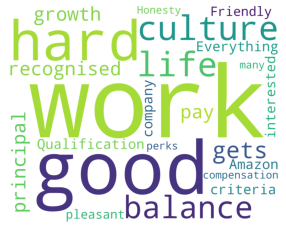

In [ ]:
def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('\t')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(6, 4))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(positive_2022_june,'white')

Negitive words


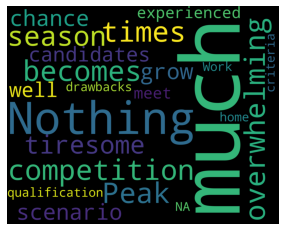

In [ ]:
# wordcloud for Negitive reviews
print("Negitive words")
wordcloud_draw(Negitive_2022_june,'Black')